# SOM

https://www.youtube.com/watch?v=0qtvb_Nx2tA

In [16]:
from minisom import MiniSom
import time
import pandas as pd

# libraries for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.colors import ListedColormap, NoNorm
import seaborn as sns
%matplotlib inline

# <div class="alert alert-info"> 3.  Data Preparation </div>

## <font color=red>**3.1. Import data**</font>

In [10]:
df = pd.read_csv('data/Wine.csv')
print(df.shape)
df.head()

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
df.Customer_Segment.value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## <font color=red>**3.2. Scaling numeric vars**

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selected_vars = [x for x in df.columns if x != 'Customer_Segment']
X = df[selected_vars]
X = X.fillna(X.mean())

scaler = MinMaxScaler(feature_range = (0,1))
X = pd.DataFrame(scaler.fit_transform(X), columns=selected_vars)
y = df['Customer_Segment']
print(X.shape)
X.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


 ## <font color=red>**5.5. SOM**</font>

 ### <font color=blue>**1. Train model**</font>

In [48]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 50, y = 50, input_len = 13, sigma = 50, learning_rate = 0.005)
som.random_weights_init(X.values)
som.train_random(data = X.values, num_iteration = 1000)

 ### <font color=blue>**2. Visualize results**</font>

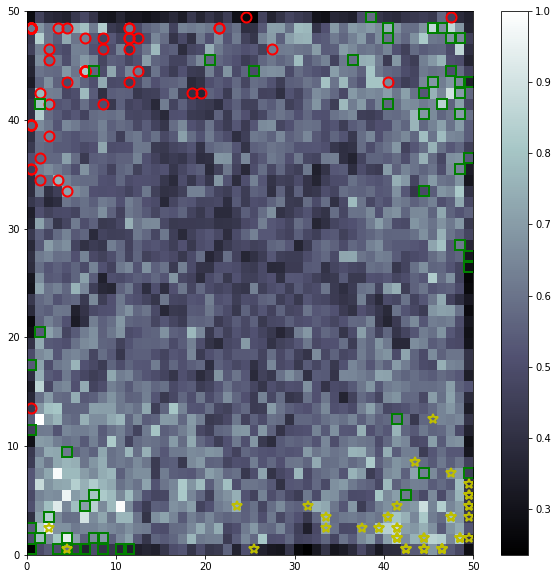

In [49]:
plt.figure(figsize=(10,10))
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', '*']
colors = ['r', 'g', 'y']
for i, x in enumerate(X.values):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]-1],
         markeredgecolor = colors[y[i]-1],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()